In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

In [2]:
measured=dict({
               'SigmaX_12C':0.165,'SigmaX_err_12C':0.007,'SigmaY_12C':0.170,'SigmaY_err_12C':0.012,               
               'SigmaZa1_12C':0.143,'SigmaZa1_err_12C':0.075,'SigmaZa2_12C':0.158,'SigmaZa2_err_12C':0.009,               
               'MeanZa1_12C':0.562,'MeanZa1_err_12C':0.078,'MeanZa2_12C':0.159,'MeanZa2_err_12C':0.009,
              
               'SigmaX_27Al':0.155,'SigmaX_err_27Al':0.021,'SigmaY_27Al':0.179,'SigmaY_err_27Al':0.012,
               'SigmaZa1_27Al':0.078,'SigmaZa1_err_27Al':0.042,'SigmaZa2_27Al':0.162,'SigmaZa2_err_27Al':0.006,               
               'MeanZa1_27Al':0.637,'MeanZa1_err_27Al':0.180,'MeanZa2_27Al':0.164,'MeanZa2_err_27Al':0.024,
                                                                                         
               'SigmaX_56Fe':0.176,'SigmaX_err_56Fe':0.010,'SigmaY_56Fe':0.197,'SigmaY_err_56Fe':0.011,
               'SigmaZa1_56Fe':0.207,'SigmaZa1_err_56Fe':0.016,'SigmaZa2_56Fe':0.176,'SigmaZa2_err_56Fe':0.002,               
               'MeanZa1_56Fe':0.573,'MeanZa1_err_56Fe':0.029,'MeanZa2_56Fe':0.202,'MeanZa2_err_56Fe':0.004,
                             
               'SigmaX_208Pb':0.202,'SigmaX_err_208Pb':0.015,'SigmaY_208Pb':0.177,'SigmaY_err_208Pb':0.015,
               'SigmaZa1_208Pb':0.076,'SigmaZa1_err_208Pb':0.088,'SigmaZa2_208Pb':0.192,'SigmaZa2_err_208Pb':0.011,               
               'MeanZa1_208Pb':0.579,'MeanZa1_err_208Pb':0.081,'MeanZa2_208Pb':0.201,'MeanZa2_err_208Pb':0.010              
              })

In [3]:
targets = ['12C','27Al','56Fe','208Pb']
variables = ['SigmaX','SigmaY','SigmaZa1','SigmaZa2','MeanZa1','MeanZa2']

# re-analysis of runs
compute the reconstructed paramters to the measured values and calculate Pvalue again

In [5]:
sims500 = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/results/runs500000_recalculated_Pvals.csv')

# reconstructed vs. measures

In [15]:
sample = sims500[(sims500.recSigmaX_unweighted>-1) 
                 & (sims500.recSigmaZa1_unweighted>-1) 
                 & (sims500.recSigmaZa2_unweighted>-1)
                 & (sims500.recMeanZa1_unweighted>-1) 
                 & (sims500.recMeanZa2_unweighted>-1)
                ]

In [16]:
len(sample)

613211

weighted average: 0.134641542599


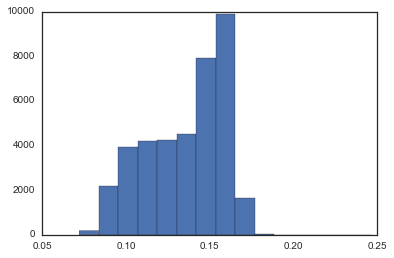

In [53]:
x , w = sample.genSigmaX , sample.PvalSigmaX_unweighted_12C
print 'weighted average:',np.average(x,weights=w)
plt.hist(x,bins=15,weights=w);

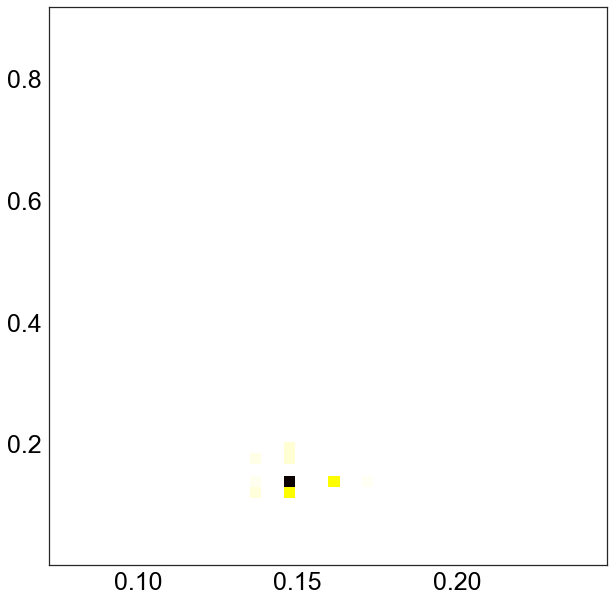

In [48]:
# sample = sims500[sims500.recSigmaZa1_unweighted>0]
plot_2d_hist(sample.genSigmaX,sample.recSigmaZa2_unweighted,weights=sample.global_Pval_12C);
# plot_2d_hist(sample.genSigmaZa1,sample.recSigmaZa1_unweighted,weights=sample.local_Pval_SigmaZa1_56Fe);

In [ ]:
debug = 1
Nmax = 1000000

# define new columns for local and global Pval
# for target in targets:
#     for var in variables:
#         sims500['local_Pval_'+var+'_'+target] = -100
#     sims500['global_Pval_'+target] = -100
    
# calculate new Pvalues
for i,row in sims500[0:Nmax].iterrows():
    
    if i%(Nmax/20)==0:
        print 100*float(i)/Nmax,'%'        

    for target in targets:
        
        z = 0        
        for var in variables:
            meas = measured[var+'_'+target]
            meas_err = measured[var+'_err_'+target]
            gen = row['gen'+var]
            rec = row['rec'+var+'_unweighted']
            rec_err = 0.001
            local_Pval = Pval2varsAssumeGausDist( meas , meas_err , rec , rec_err )
            sims500.loc[i, 'local_Pval_'+var+'_'+target] = local_Pval
            
            if debug>2 and np.abs(local_Pval - row['Pval'+var+'_unweighted_'+target])>1e-50:
                print 'local Pval different than in df:\n',target, var,'meas:',meas,'gen:',gen,'rec:',rec,'local Pval:',local_Pval,'while in df:',row['Pval'+var+'_unweighted_'+target]
                
            z -= 2*np.log( local_Pval )

        
        global_Pval = chisqprob( z , 2*len(variables) )
        sims500.loc[i, 'global_Pval_'+target ] = global_Pval
        if debug and np.abs(global_Pval - row['PvalTotal_unweighted_'+target])>0.001:
            print 'different global Pval:',target, global_Pval,'while in df:', row['PvalTotal_unweighted_'+target]
        
print 'done.'

0.0 %
